# ML titanic prediction kaggle competion

<h2> Aim of the Notebook </h2>

This notebook is created for titanic kaggle competition. Notebook develop Random Forest Classifier for titanic survival chance

<h2> Data </h2>

Dataset provides information about passangers on titanic and did they survive or not. Splitted in test.csv and train.csv

- survival: is passanger a survival
    - 0 = No, 1 = Yes
- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
- age: Age in years
- sex: Sex of the passanger

- sibsp: # of siblings / spouses aboard the Titanic
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: # of parents / children aboard the Titanic 	
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked:Port of Embarkation 	
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [57]:
titanic_train = pd.read_csv("../../data/train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
titanic_test = pd.read_csv("../../data/test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
print("Train data NA's")
titanic_train.isna().sum()

Train data NA's


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
print("Test data NA's")
titanic_test.isna().sum()

Test data NA's


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Preprocessing

In [61]:
#count number of words by spaces in names
name_words_count = titanic_train.Name.apply(lambda x: x.count(" "))
titanic_train["Name"] = name_words_count

name_words_count = titanic_test.Name.apply(lambda x: x.count(" "))
titanic_test["Name"] = name_words_count

#Encoding for sex (1 - male, 0 - female)
titanic_train["Sex"]= titanic_train.Sex.apply(lambda x: x == "male")
titanic_test["Sex"]= titanic_test.Sex.apply(lambda x: x == "male")

#Encoding TRUE FALSE for survivng
titanic_train["Survived"] = titanic_train.Survived == 1

#drop tickets number and cabins from dataset
titanic_train = titanic_train.drop(["Ticket"], axis=1)
titanic_test = titanic_test.drop(["Ticket"], axis=1)

In [62]:
#Getting cabins deck
cabins_group = titanic_train[-titanic_train.Cabin.isna()].Cabin.astype(str).apply(lambda x: x[0])

#Copy the df and assign the cabins
titanic_with_cabins = titanic_train[-titanic_train.Cabin.isna()].copy()
titanic_with_cabins["Cabin"] = cabins_group

titanic_with_cabins = titanic_with_cabins.rename(columns={"Cabin":"Deck"})

titanic_with_cabins.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Deck,Embarked
1,2,True,1,6,False,38.0,1,0,71.2833,C,C
3,4,True,1,6,False,35.0,1,0,53.1000,C,S
6,7,False,1,3,True,54.0,0,0,51.8625,E,S
10,11,True,3,3,False,4.0,1,1,16.7000,G,S
11,12,True,1,2,False,58.0,0,0,26.5500,C,S


# Distributions

Text(0.5, 1.0, 'Pclass (In full dataset) Distibution')

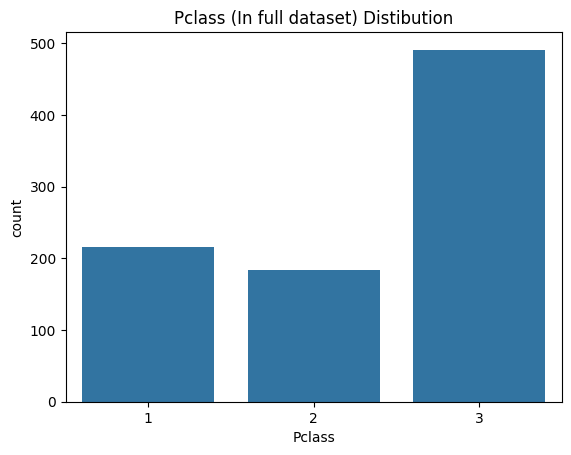

In [63]:
sns.countplot(titanic_train,x="Pclass")
plt.title("Pclass (In full dataset) Distibution")

Text(0.5, 1.0, 'Survival distrbution')

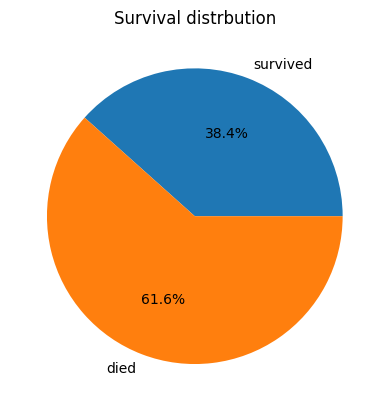

In [64]:
survival_rate = (titanic_train['Survived'] == 1).mean() * 100
survival = pd.DataFrame({
    "labels":["survived","died"],
    "values":[survival_rate, 100 -  survival_rate]
})
plt.pie(survival["values"], labels=survival["labels"], autopct='%1.1f%%')
plt.title("Survival distrbution")

Text(0.5, 1.0, 'Words in name distribution')

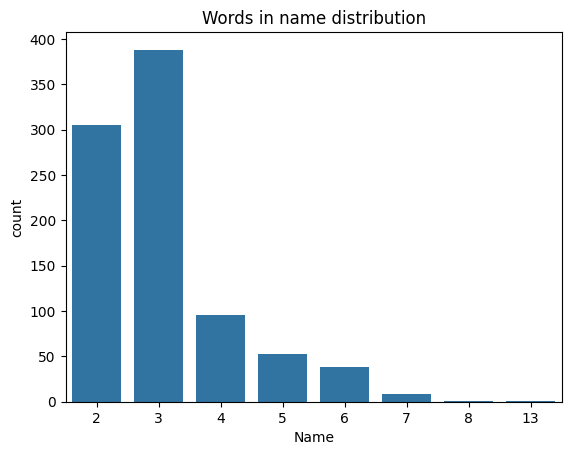

In [65]:
sns.countplot(titanic_train, x="Name")
plt.title("Words in name distribution")

Text(0.5, 0, 'Male')

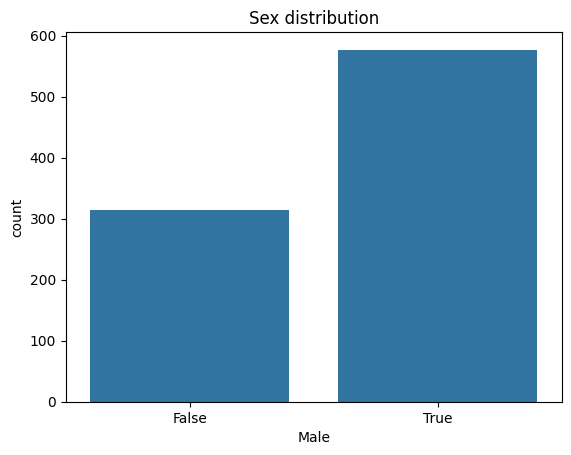

In [66]:
sns.countplot(titanic_train, x="Sex")
plt.title("Sex distribution")
plt.xlabel("Male")

Text(0.5, 1.0, 'Age distribution')

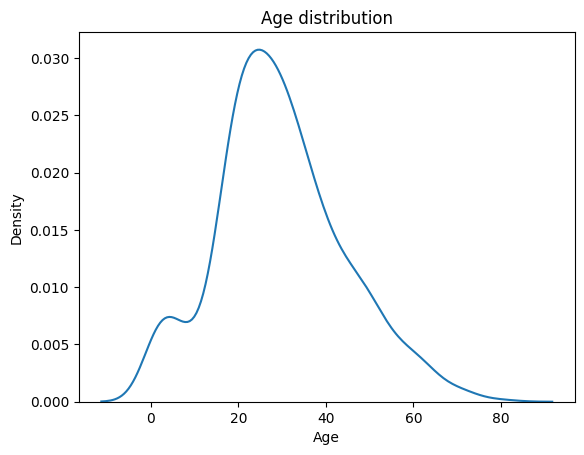

In [67]:
sns.kdeplot(titanic_train, x="Age")
plt.title("Age distribution")

Text(0.5, 1.0, 'Fare distrbution')

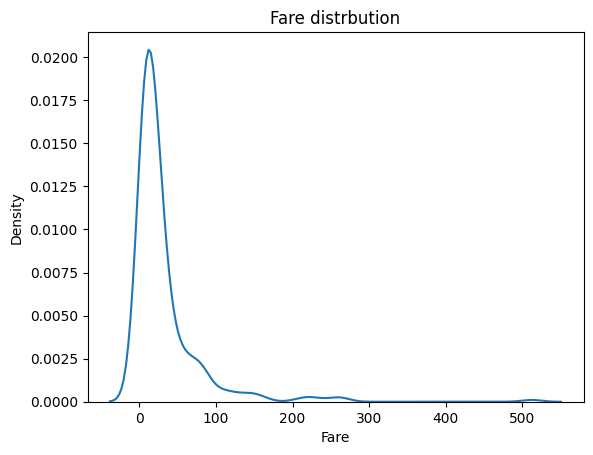

In [68]:
sns.kdeplot(titanic_train, x="Fare")
plt.title("Fare distrbution")

### Deck

Text(0.5, 1.0, 'Pclass in the distribution of decks (reduced dataset)')

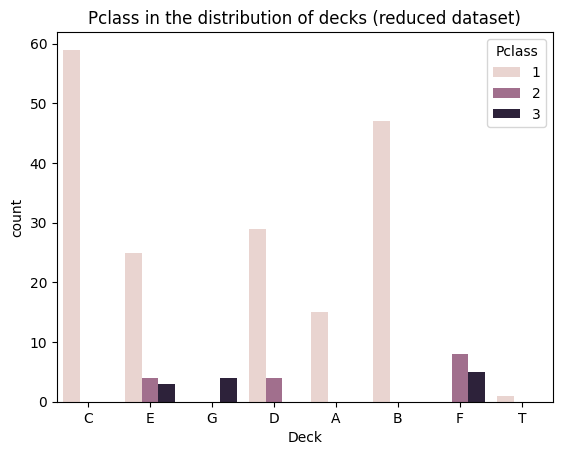

In [69]:
sns.countplot(titanic_with_cabins,x="Deck", hue="Pclass")
plt.title("Pclass in the distribution of decks (reduced dataset)")

Text(0.5, 1.0, 'Fare in the distribution of decks')

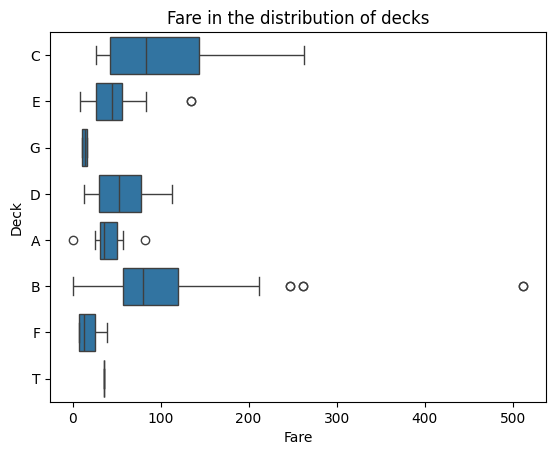

In [70]:
sns.boxplot(titanic_with_cabins, x="Fare", y = "Deck")
plt.title("Fare in the distribution of decks")

Text(0.5, 1.0, 'Deck survival distribution')

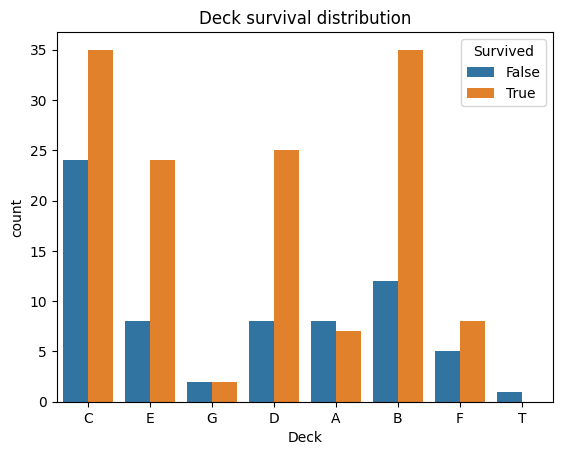

In [71]:
sns.countplot(titanic_with_cabins,x="Deck", hue="Survived")
plt.title("Deck survival distribution")

Cabin's deck have potential to predict survival on titatinic. But there is to few data for all NA filling. Deck prediction requires additional research

# NA filling

Fill (or delete) NA from dataset

In [72]:
#for model import 
import joblib

Filling NA's is done with mine [AGE random forest regressor model](https://github.com/PigStep/ML-Titanic-Kaggle-contest/blob/main/notebooks/Age%20regressor%20notebook/Age_regressor.ipynb)

In [73]:
def fillAgeNA(data):
    """
    Fill all Age NA in dataframe with imported age regressor model
    
    Input:
        `data`: dataframe with Age column to fill

    Output:
        dataframe with filled age NA's
    """
    #fill age NA with my AGE regressor
    age_regressor = joblib.load("../../job lib models/Age_RF_predictor.joblib")

    #get collums to predict
    age_for_pred = data[data.Age.isna()]

    #preproccessing for model
    age_for_pred = pd.get_dummies(age_for_pred,columns=["Embarked"])

    if "Survived" in data.columns:
        age_for_pred = age_for_pred.drop("Survived",axis=1) #Drop survived column if train df

    X_pred = age_for_pred.drop(["Age","Cabin","PassengerId"],axis=1)

    #get predicted values in int format
    age_predicted = pd.Series(np.round(age_regressor.predict(X_pred),0))

    index_missing_age = data[data['Age'].isna()].index
    data.loc[index_missing_age, 'Age'] = age_predicted.values

    return data

In [74]:
#filling train df
titanic_train = fillAgeNA(titanic_train)

#filling test df
titanic_test = fillAgeNA(titanic_test)

In [75]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We will drop `Cabin` and some NA positions `Embarked` in cause of Data unusability (Like `Cabin`) and few amount of NA (`Embarked`)

In [76]:
#Drop Cabin
titanic_train = titanic_train.drop("Cabin",axis=1)
titanic_test = titanic_test.drop("Cabin",axis=1)

#Drop NA embarked
titanic_train = titanic_train[- titanic_train.Embarked.isna()]
titanic_test = titanic_test[- titanic_test.Embarked.isna()]

Text(0.5, 1.0, 'Filled Age distibution')

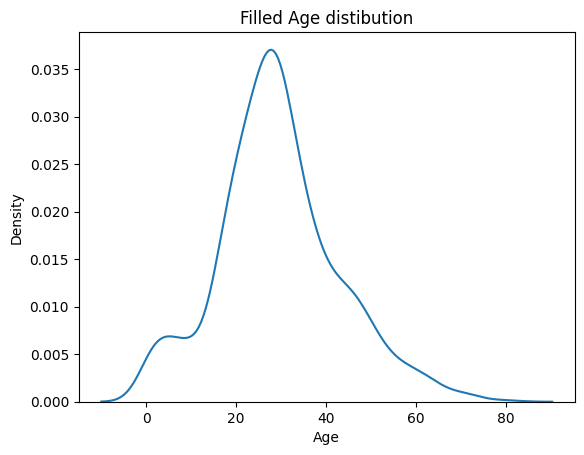

In [77]:
sns.kdeplot(titanic_train,x="Age")
plt.title("Filled Age distibution")

# EDA

In [78]:
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

Lets find some correlations with survivng on titanic

Text(0.5, 1.0, 'Surviving among classes')

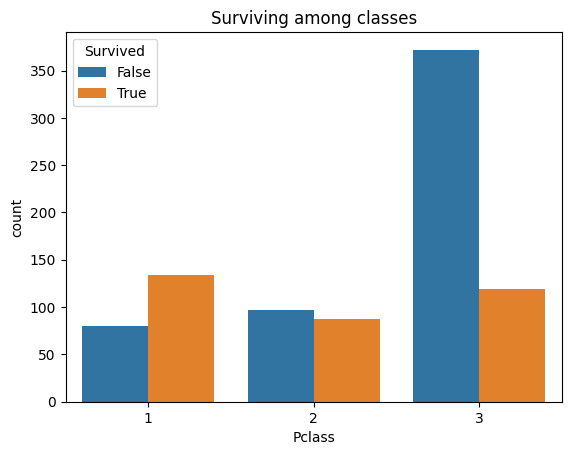

In [79]:
sns.countplot(titanic_train,hue="Survived",x="Pclass")
plt.title("Surviving among classes")

In [80]:
#Usie chisq to prove independance
cross_matrix = pd.crosstab(index=titanic_train["Pclass"], columns=titanic_train["Survived"])

print(f"Chisquare p-value of Pclass independece is: {chi2_contingency(cross_matrix).pvalue:.4f}")

Chisquare p-value of Pclass independece is: 0.0000


Text(0.5, 1.0, 'Surviving among names')

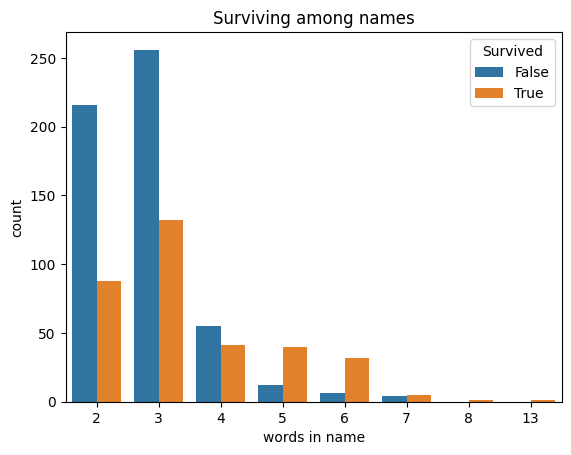

In [81]:
sns.countplot(titanic_train, x="Name",hue="Survived")
plt.xlabel("words in name")
plt.title("Surviving among names")

In [82]:
# Chisq test for Name independece
cross_matrix = pd.crosstab(index=titanic_train["Name"],columns=titanic_train["Survived"])

print(f"Chisquare p-value of Pclass independece is: {chi2_contingency(cross_matrix).pvalue:4f}")

Chisquare p-value of Pclass independece is: 0.000000


Text(0.5, 1.0, 'Sex and surviving')

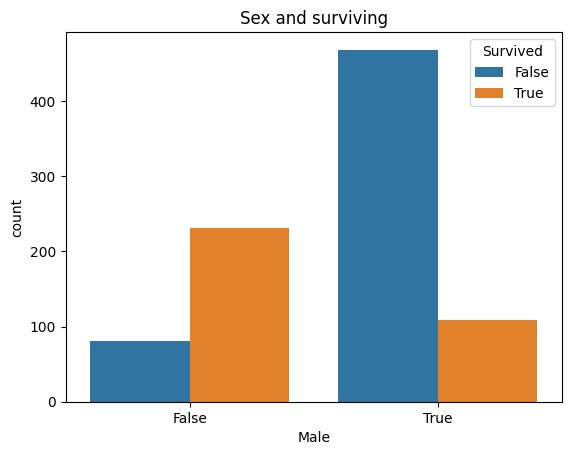

In [83]:
sns.countplot(titanic_train, x= "Sex", hue="Survived")
plt.xlabel("Male")
plt.title("Sex and surviving")

Text(0.5, 1.0, 'Age and survivng')

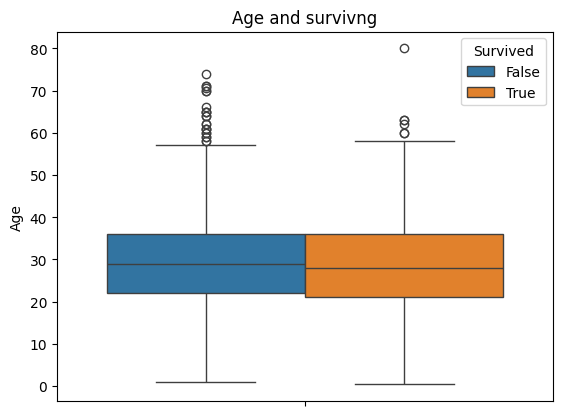

In [84]:
sns.boxplot(titanic_train,y="Age",hue="Survived")
plt.title("Age and survivng")

In [85]:
# Create subsets of ages by surving
survived_False = titanic_train[titanic_train.Survived == False]["Age"]
survived_True = titanic_train[titanic_train.Survived == True]["Age"]

print(f"T-test p-value of independence: {ttest_ind(survived_True, survived_False).pvalue:.4f}")

T-test p-value of independence: 0.0510


Text(0.5, 1.0, 'Siblings and surviving')

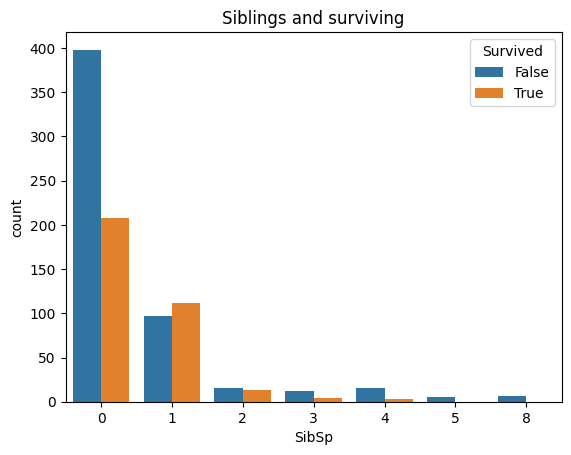

In [86]:
sns.countplot(titanic_train, x="SibSp",hue="Survived")
plt.title("Siblings and surviving")

In [87]:
# For chi2 test
cross_matrix = pd.crosstab(index=titanic_train["SibSp"],columns=titanic_train["Survived"])
print(f"Chisquare p-value of SibSp independece is: {chi2_contingency(cross_matrix).pvalue:4f}")

Chisquare p-value of SibSp independece is: 0.000001


Text(0.5, 1.0, 'Number of parches and survival')

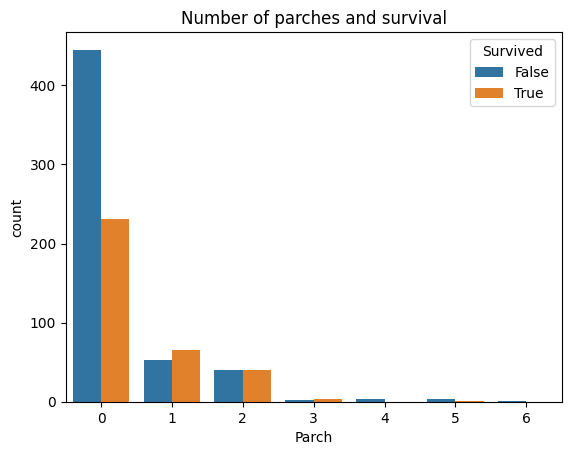

In [88]:
sns.countplot(titanic_train,x="Parch",hue="Survived")
plt.title("Number of parches and survival")

In [89]:
cross_matrix = pd.crosstab(index=titanic_train["Parch"],columns=titanic_train["Survived"])
print(f"Chisquare p-value of SibSp independece is: {chi2_contingency(cross_matrix).pvalue:4f}")

Chisquare p-value of SibSp independece is: 0.000079


Text(0.5, 1.0, 'Fare and surviving')

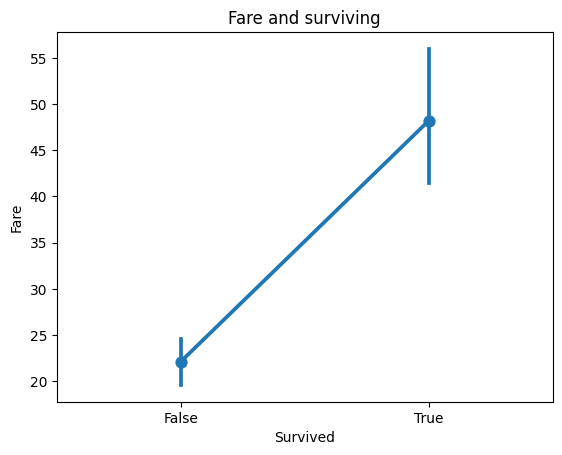

In [90]:
sns.pointplot(titanic_train,y="Fare",x="Survived")
plt.title("Fare and surviving")

As data have multiple extreme values, boxplot is less informative, than point plot. Because of this fact (and non normal distibution) we use mannwitney test instead of T-test

In [91]:
# Create subsets of fares by surving
survived_False = titanic_train[titanic_train.Survived == False]["Fare"]
survived_True = titanic_train[titanic_train.Survived == True]["Fare"]

print(f"Mannwitney p-value of Fair independence: {mannwhitneyu(survived_True, survived_False).pvalue:.4f}")

Mannwitney p-value of Fair independence: 0.0000


Text(0.5, 1.0, 'Destination and surviving')

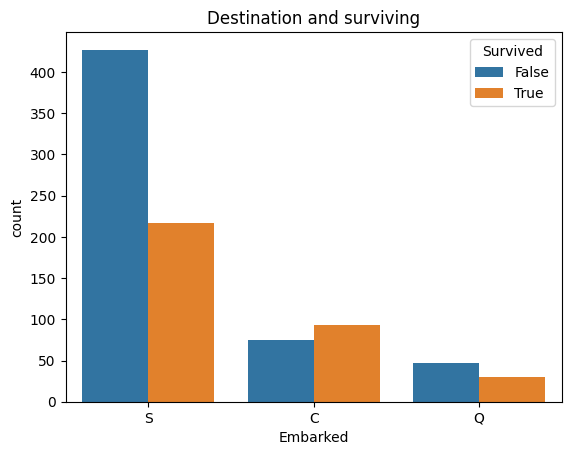

In [92]:
sns.countplot(titanic_train,x="Embarked", hue="Survived")
plt.title("Destination and surviving")

In [93]:
cross_matrix = pd.crosstab(index=titanic_train["Embarked"],columns=titanic_train["Survived"])
print(f"Chisquare p-value of Embarked independece is: {chi2_contingency(cross_matrix).pvalue:4f}")

Chisquare p-value of Embarked independece is: 0.000002


This seem strange, but lets go deeper and examine coreltion of destinations with classes

Text(0.5, 1.0, 'Destination and passanger classes')

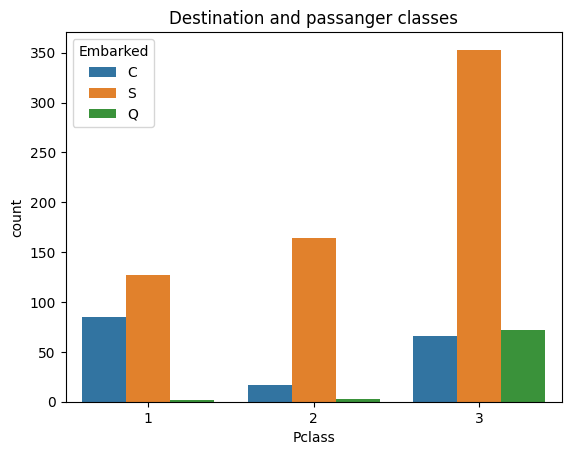

In [94]:
sns.countplot(titanic_train,x="Pclass",hue="Embarked")
plt.title("Destination and passanger classes")

As we can see, most of 3-class have a road tip to C port. As we know fom `Classes and surviving`, classes have correlation with surviving. It means that we see an confounding variables: `Pclass` and `Embarked` 

# Model building

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import RocCurveDisplay

In [96]:
titanic_train = titanic_train.set_index("PassengerId")
#One hot encoding
titanic_train = pd.get_dummies(titanic_train, columns=["Embarked"])

#Create train data
X = titanic_train.drop("Survived",axis=1)
y = titanic_train["Survived"]

X_train,x_test,y_train, y_test = train_test_split(X,y,test_size=0.33,stratify=y)

In [97]:
def computeSearch(parameters):
    """
    Compute hyperparameters for random forest using GridSearch

    Output: 
        Array with best parameters
    """
    clf = RandomForestClassifier(random_state=42,criterion="entropy")
    search = GridSearchCV(clf,param_grid=parameters,n_jobs=-1,scoring="f1",verbose=True)
    search.fit(X_train,y_train)

    return search.best_params_

In [98]:
parameters = {
    "n_estimators":range(100,300,50),
    "max_depth":range(10,30,10),
    "min_samples_split":range(25,100,25),
    "min_samples_leaf":range(25,100,25),
    "max_leaf_nodes" : range(5,20,5)
}
# computeSearch(parameters)

#Second compute # - result of previous search
parameters =  {
    'max_depth': range(5,20,5), #10
    'max_leaf_nodes': range(5,15,5), #10
    'min_samples_leaf': range(5,25,5), #25
    'min_samples_split': range(50,100,15), #75
    'n_estimators': range(200,300,25) #250
}
# computeSearch(parameters)

#Third compute # - result of previous search
parameters =  {
    'max_depth': range(3,15,3), #10
    'max_leaf_nodes': range(3,15,3), #10
    # 'min_samples_leaf': range(2,5,2), #5
    'min_samples_split': range(35,65,5), #50
    'n_estimators': range(175,225,15) #200
}
# computeSearch(parameters)

#Forth compute # - result of previous search
parameters =  {
    'max_depth': range(6,12,2), #9
    'max_leaf_nodes': range(12,15), #12
    'min_samples_leaf': range(2,5,2), #5
    'min_samples_split': range(50,60,2), #55
    'n_estimators': range(100,175,25) #175
}
# computeSearch(parameters)

#Fifth compute # - result of previous search
parameters =  {
    # 'max_depth': 10, - last one
    # 'max_leaf_nodes': 13, - last one
    # 'min_samples_leaf': 4, - last one
    'min_samples_split': range(30,50,5), #50
    'n_estimators': range(50,125,25) #100
}
# computeSearch(parameters)

#Sixth compute # - result of previous search
parameters =  {
    # 'max_depth': 10, - last one
    # 'max_leaf_nodes': 13, - last one
    # 'min_samples_leaf': 4, - last one
    'min_samples_split': range(35,45), #40
    'n_estimators': range(10,75) #50
}
# computeSearch(parameters)

#Final compute params
parameters =  {
    'max_depth': 10,
    'max_leaf_nodes': 13,
    'min_samples_leaf': 4,
    'min_samples_split': 43,
    'n_estimators': 62
}

Text(0.5, 1.0, 'ROC-AUC score of created model')

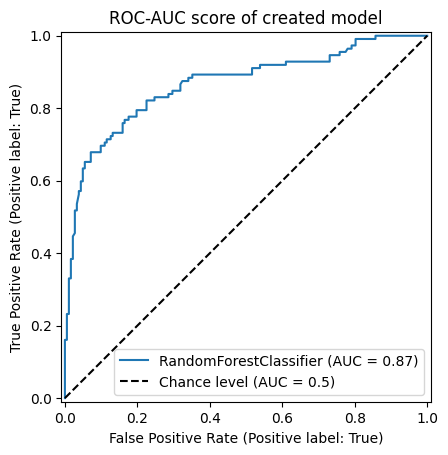

In [99]:
clf = RandomForestClassifier(**parameters,random_state=42)
clf.fit(X_train,y_train)
RocCurveDisplay.from_estimator(clf,x_test, y_test,plot_chance_level=True)
plt.title("ROC-AUC score of created model")

Text(0.5, 1.0, 'Feature impotance')

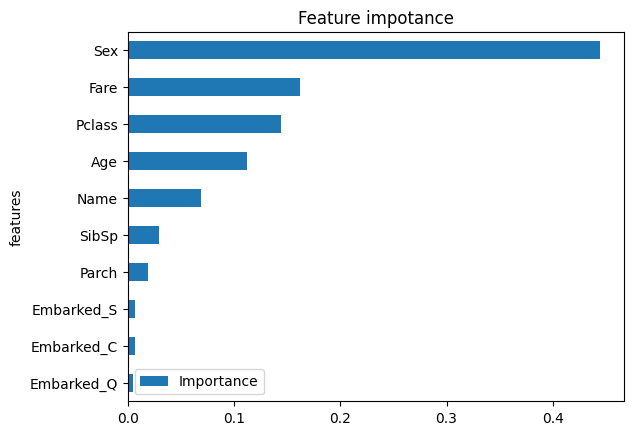

In [100]:
feature_impotances = pd.DataFrame({
    "features":X_train.columns,
    "Importance":clf.feature_importances_
}).sort_values(by="Importance",ascending=True).plot(kind="barh",x="features",y="Importance")
plt.title("Feature impotance")

As we can see, the most important features are:
1. Sex **
2. Fare *
3. Pclass *
4. Age *

** - most important, * - less important

# Conclusion

Research impacted titanic's survivng factors and develop Random Forest Classifier with AUC score 0.87. This notebook is a example of basic machine learning tools and introducing into kaggle competitions 